<a href="https://colab.research.google.com/github/Daniel-Benson-Poe/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Daniel_Benson_LS_DS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [5]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-11-08 00:12:31--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.131.133
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.131.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.1’

instacart_online_gr 100%[===================>] 196.03M  26.8MB/s    in 7.8s    

2019-11-08 00:12:39 (25.0 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.1’ saved [205548478/205548478]



In [6]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [7]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [8]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
order_products__prior = pd.read_csv('order_products__prior.csv')
order_products__train = pd.read_csv('order_products__train.csv')

In [48]:
aisles.columns

Index(['aisle_id', 'aisle'], dtype='object')

In [49]:
departments.columns

Index(['department_id', 'department'], dtype='object')

In [50]:
print(orders.columns)
print(orders.shape)
orders.head()

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')
(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [51]:
print(products.columns)
print(products.shape)
products.head()

Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')
(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [52]:
print(order_products__prior.columns)
print(order_products__prior.shape)
order_products__prior.head()

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')
(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [0]:
# product_id from order_products__prior and products
# product_name from products

In [55]:
cols = ['product_id', 'product_name']
products = products[cols]
products.head()

,product_id,product_name
0,1,Chocolate Sandwich Cookies
1,2,All-Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,Green Chile Anytime Sauce


In [56]:
print(order_products__prior.shape)
print(order_products__train.shape)

(32434489, 4)
(1384617, 4)


In [57]:
order_products = pd.concat([order_products__prior, order_products__train])
print(order_products.shape)
order_products.head()

(33819106, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [0]:
columns =  ['product_id']

In [59]:
order_products_subset = order_products[columns]
order_products_subset 

,product_id
0,33120
1,28985
2,9327
3,45918
4,30035
...,...
1384612,14233
1384613,35548
1384614,35951
1384615,16953


In [60]:
merged_order_products = pd.merge(products, order_products_subset, on='product_id', how='inner')
merged_order_products

,product_id,product_name
0,1,Chocolate Sandwich Cookies
1,1,Chocolate Sandwich Cookies
2,1,Chocolate Sandwich Cookies
3,1,Chocolate Sandwich Cookies
4,1,Chocolate Sandwich Cookies
...,...,...
33819101,49688,Fresh Foaming Cleanser
33819102,49688,Fresh Foaming Cleanser
33819103,49688,Fresh Foaming Cleanser
33819104,49688,Fresh Foaming Cleanser


In [61]:
merged_order_products['product_name'].value_counts().head(10)

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64

In [62]:
merged_order_products.shape

(33819106, 2)

## Reshape Data Section

- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
- Table 2 --> Tidy
- Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
# Imports
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

Part 1: Simple Examples

In [64]:
# Create df1
df1 = pd.DataFrame([['a', 1], ['b', 2]], columns=['letter', 'number'])
df1.head()

,letter,number
0,a,1
1,b,2


In [65]:
# Create df2
df2 = pd.DataFrame([['c', 3], ['d', 4]], columns=['letter', 'number'])
df2.head()

,letter,number
0,c,3
1,d,4


In [66]:
# Let's stick the dataframes on top of each other using concat
# axis=0 indicates a row operation. It is the default
df3 = pd.concat([df1, df2], axis=0)
df3

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [67]:
# Let's stick the dataframes next to each other using concat
# Axis=1 indicates a column operation
df4 = pd.concat([df1, df2], axis=1)
df4.head()

,letter,number,letter,number
0,a,1,c,3
1,b,2,d,4


In [68]:
# Stock names
stockname = pd.DataFrame({'Symbol':['AMZN', 'MSFT', 'FB', 'AAPL', 'GOOGL'],
                          'Name':['Amazon', 'Microsoft', 'Facebook', 'Apple', 'Google']})
stockname

,Symbol,Name
0,AMZN,Amazon
1,MSFT,Microsoft
2,FB,Facebook
3,AAPL,Apple
4,GOOGL,Google


In [69]:
# Stock prices
openprice = pd.DataFrame({'Symbol':['AAPL', 'MSFT', 'GOOGL', 'FB', 'AMZN'],
                          'OpenPrice':[217.51, 96.54, 501.3, 51.45, 1703.34]})
openprice

,Symbol,OpenPrice
0,AAPL,217.51
1,MSFT,96.54
2,GOOGL,501.30
3,FB,51.45
4,AMZN,1703.34


In [70]:
# Merge these dataframes
named_stocks = pd.merge(openprice, stockname)
named_stocks

,Symbol,OpenPrice,Name
0,AAPL,217.51,Apple
1,MSFT,96.54,Microsoft
2,GOOGL,501.30,Google
3,FB,51.45,Facebook
4,AMZN,1703.34,Amazon


In [71]:
# Create a 3rd dataset of weekly highs
wkhigh = pd.DataFrame({'Symbol':['FB', 'AMZN', 'AAPL', 'MSFT', 'NFLX'], 
                       '52wkHigh':[60.79, 2050.49, 233.47, 110.11, 303.22]})
wkhigh

,Symbol,52wkHigh
0,FB,60.79
1,AMZN,2050.49
2,AAPL,233.47
3,MSFT,110.11
4,NFLX,303.22


In [72]:
# Merge that with the named stocks
full_stocks = pd.merge(named_stocks, wkhigh, on='Symbol', how='outer')
# full_stocks = pd.merge(named_stocks, wkhigh, on='Symbol', how='left')
# full_stocks = pd.merge(named_stocks, wkhigh, on='Symbol', how='inner')
# full_stocks = pd.merge(named_stocks, wkhigh, on='Symbol', how='right ')
full_stocks


,Symbol,OpenPrice,Name,52wkHigh
0,AAPL,217.51,Apple,233.47
1,MSFT,96.54,Microsoft,110.11
2,GOOGL,501.30,Google,NaN
3,FB,51.45,Facebook,60.79
4,AMZN,1703.34,Amazon,2050.49
5,NFLX,NaN,NaN,303.22


In [73]:
# This is code to display a `.png` inside of a jupyter notebook.
from IPython.display import display, Image
url = 'https://shanelynnwebsite-mid9n9g1q9y8tt.netdna-ssl.com/wp-content/uploads/2017/03/join-types-merge-names.jpg'
venn_diagram = Image(url=url, width=600)
display(venn_diagram)

In [0]:
# Create a simple table
table1 = pd.DataFrame(
    [[np.nan, 2],
     [16, 11], 
     [3, 1]],
     index=['John Smith', 'Jane Doe', 'Mary Johnson'],
     columns=['treatmenta', 'treatmentb'])


In [75]:
# This is example of wide format
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [76]:
# Same information can be displayed by transposing the table
# Another form of wide format
table2 = table1.T 
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


Use pandas melt function to reshape table 1 into Tidy format

In [77]:
# Get the column names as a list
table1.columns.tolist()

['treatmenta', 'treatmentb']

In [78]:
# Get the index values as another list
table1.index.tolist()

['John Smith', 'Jane Doe', 'Mary Johnson']

In [79]:
# For table 1, convert the index into a column using the 'reset index' method
table1 = table1.reset_index()
table1

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [80]:
# Convert table from wide to tidy
tidy = table1.melt(id_vars='index', value_vars=['treatmenta', 'treatmentb'])
tidy

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [81]:
# Rename the columns
tidy = tidy.rename(columns={
    'index':'name',
    'variable':'trt',
    'value':'result'
})
# Shorten the trt values
tidy.trt = tidy.trt.str.replace('treatment', '')
tidy

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


In [102]:
  table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [101]:
tidy2 = table2.melt()
tidy2

,variable,value
0,John Smith,NaN
1,John Smith,2.0
2,Jane Doe,16.0
3,Jane Doe,11.0
4,Mary Johnson,3.0
5,Mary Johnson,1.0


In [105]:
# Rename the columns:
tidy2 = tidy2.rename(columns={
    'variable':'name',
    'value':'result'
})

tidy2

,name,result
0,John Smith,NaN
1,John Smith,2.0
2,Jane Doe,16.0
3,Jane Doe,11.0
4,Mary Johnson,3.0
5,Mary Johnson,1.0


In [103]:
# pivot_table function is the inverse of melt
wide = tidy.pivot_table(index='name', columns='trt', values='result')
wide

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


In [108]:
# tidy to table2
wide2 = tidy.pivot_table(index='trt', columns='name', values='result')
wide2

name,Jane Doe,John Smith,Mary Johnson
trt,,,
a,16.0,NaN,3.0
b,11.0,2.0,1.0


Seaborn

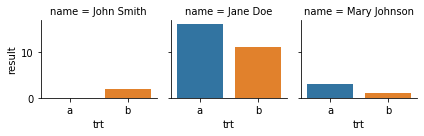

In [110]:
sns.catplot(x='trt', y='result', col='name',
            kind='bar', data=tidy, height=2);

Part 2: More Complex Examples

In [0]:
# Here's some data about Chicago bikesharing.
source_path='https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/Divvy_Trips_dataset/'
q1_path=source_path + 'Divvy_Trips_2015-Q1.csv'
q2_path=source_path + 'Divvy_Trips_2015-Q2.csv'
q3_path=source_path + 'Divvy_Trips_2015-Q3.csv'
q4_path=source_path + 'Divvy_Trips_2015-Q4.csv'

In [112]:
# Take a look at the first quarter
q1 = pd.read_csv(q1_path)
print(q1.shape)
q1.head()

(1000, 12)


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,4607895,3/12/2015 7:11,3/12/2015 7:16,2058,322,75,Canal St & Jackson Blvd,284,Michigan Ave & Jackson Blvd,Subscriber,Male,1960.0
1,4467889,1/22/2015 17:07,1/22/2015 17:10,2499,178,16,Wood St & North Ave,58,Marshfield Ave & Cortland St,Subscriber,Male,1977.0
2,4644042,3/16/2015 10:30,3/16/2015 10:36,369,346,91,Clinton St & Washington Blvd,100,Orleans St & Merchandise Mart Plaza,Subscriber,Male,1986.0
3,4598015,3/10/2015 17:19,3/10/2015 17:36,857,1048,134,Peoria St & Jackson Blvd,128,Damen Ave & Chicago Ave,Subscriber,Male,1984.0
4,4467863,1/22/2015 17:02,1/22/2015 17:12,2241,611,52,Michigan Ave & Lake St,192,Canal St & Adams St,Subscriber,Male,1963.0


In [113]:
# And the second quarter?
q2 = pd.read_csv(q2_path)
print(q1.shape)
q2.head()

(1000, 12)


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,5019758,5/2/2015 10:05,5/2/2015 10:14,72,545,223,Clifton Ave & Armitage Ave,349,Halsted St & Wrightwood Ave,Subscriber,Male,1978.0
1,4874907,4/15/2015 17:21,4/15/2015 17:26,2683,304,197,Michigan Ave & Madison St,174,Canal St & Madison St,Subscriber,Male,1964.0
2,5149598,5/14/2015 6:23,5/14/2015 6:37,3404,806,273,Michigan Ave & 16th St,192,Canal St & Adams St,Subscriber,Male,1982.0
3,5127077,5/12/2015 6:33,5/12/2015 6:55,2374,1342,305,Western Ave & Division St,24,Fairbanks Ct & Grand Ave,Subscriber,Female,1989.0
4,4776193,4/4/2015 19:16,4/4/2015 19:39,2848,1432,85,Michigan Ave & Oak St,304,Broadway & Waveland Ave,Subscriber,Male,1978.0


In [114]:
# Do they have the same columns?
print(q1.columns)
print(q2.columns)

Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')
Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')


In [115]:
# Let's define a function to check if they're really equal
def difference_checker(list1, list2):
  difference = list(set(list1) - set(list2))
  print("The difference is: ", difference)

difference_checker(q1.columns, q2.columns)

The difference is:  []


In [116]:
# We're sure they're equal, so let's concatenate them
q1_q2 = pd.concat([q1, q2], axis=0)
q1_q2.shape

(2000, 12)

In [117]:
# Confirm that did what we wanted it to
print(q1.shape)
print(q2.shape)
print(q1_q2.shape)

(1000, 12)
(1000, 12)
(2000, 12)


In [118]:
# Add quarters 3 and 4 as well
q3 = pd.read_csv(q3_path)
q4 = pd.read_csv(q4_path)

allbikes = pd.concat([q1, q2, q3, q4], axis=0)
print(allbikes.shape)
allbikes.sample(4)

(4000, 12)


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
641,7167040,8/28/2015 15:13,8/28/2015 15:23,14,568,437,Washtenaw Ave & 15th St,442,California Ave & 23rd Pl,Subscriber,Male,1948.0
81,5883516,6/28/2015 7:46,6/28/2015 7:59,1646,760,61,Wood St & Milwaukee Ave,186,Ogden Ave & Race Ave,Subscriber,Male,1980.0
697,7253985,9/2/2015 18:09,9/2/2015 18:28,895,1176,47,State St & Kinzie St,69,Damen Ave & Pierce Ave,Subscriber,Male,1986.0
93,7763727,10/2/2015 10:54,10/2/2015 11:01,1661,439,304,Broadway & Waveland Ave,253,Clifton Ave & Lawrence Ave,Subscriber,Male,1987.0


Merging Datasets about counties

In [0]:
# Get some population data about counties from the Census Bureau
source1='https://raw.githubusercontent.com/austinlasseter/dash-virginia-counties/master/resources/acs2017_county_data.csv'

In [122]:
# Read that into pandas and check out five sample rows
census = pd.read_csv(source1)
census.sample(5)

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
2375,46029,South Dakota,Codington County,27963,14163,13800,2.1,93.2,0.5,1.7,0.6,0.0,21007,52025,2248,29249,1744,11.7,12.5,27.4,15.7,27.9,10.2,18.7,83.9,7.6,0.3,2.1,0.8,5.4,14.4,15522,81.5,11.0,7.2,0.3,2.5
1711,31115,Nebraska,Loup County,537,260,277,0.0,99.6,0.0,0.4,0.0,0.0,433,58625,6306,29248,2798,8.9,9.6,49.5,10.8,10.5,15.6,13.6,57.3,4.1,0.0,4.9,0.7,33.0,26.7,295,43.7,17.6,38.0,0.7,0.7
2951,51830,Virginia,Williamsburg city,14817,6829,7988,7.7,67.9,14.5,0.2,5.8,0.0,12229,54606,4779,26921,2353,21.5,14.0,47.2,23.1,20.7,3.9,5.1,60.6,8.4,6.2,15.0,3.2,6.6,19.6,6235,64.4,33.8,1.9,0.0,7.3
641,17093,Illinois,Kendall County,122933,60801,62132,17.6,71.2,6.4,0.1,3.2,0.0,82182,89860,4149,33369,997,5.6,7.4,38.2,13.8,26.7,9.2,12.1,83.4,7.2,3.1,0.6,0.9,4.8,33.0,63352,85.3,11.7,2.8,0.2,5.0
2130,39175,Ohio,Wyandot County,22190,10992,11198,2.7,95.3,0.3,0.0,0.9,0.0,16760,49767,2147,25431,1153,11.3,12.0,26.0,14.1,19.0,11.5,29.4,84.3,9.3,0.1,2.2,1.6,2.5,21.7,10902,83.3,11.6,4.9,0.3,4.2


In [123]:
# What are all the columns?
print(census.columns)

Index(['CountyId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')


In [0]:
# Let's restrict that to a few columns for simple analysis on commute times
commute = census[['CountyId', 'State', 'County', 'MeanCommute']]

In [126]:
# What's the average commute in the USA?
commute['MeanCommute'].mean()

23.47453416149071

In [0]:
# Now let's augment that with some outside data from USDA.
source2='https://github.com/austinlasseter/dash-virginia-counties/blob/master/resources/ruralurbancodes2013.xls?raw=true'

In [129]:
# Take a look at the new data
usda = pd.read_excel(source2)
usda.sample(5)

,FIPS,State,County_Name,Population_2010,RUCC_2013,Description
1563,29161,MO,Phelps County,45156,5,"Nonmetro - Urban population of 20,000 or more,..."
1468,28135,MS,Tallahatchie County,15378,7,"Nonmetro - Urban population of 2,500 to 19,999..."
2064,39043,OH,Erie County,77079,4,"Nonmetro - Urban population of 20,000 or more,..."
797,19017,IA,Bremer County,24276,3,Metro - Counties in metro areas of fewer than ...
532,13295,GA,Walker County,68756,2,"Metro - Counties in metro areas of 250,000 to ..."


In [130]:
# What are those RUCC codes?
usda.groupby('RUCC_2013')[['Description']].max()

,Description
RUCC_2013,
1,Metro - Counties in metro areas of 1 million p...
2,"Metro - Counties in metro areas of 250,000 to ..."
3,Metro - Counties in metro areas of fewer than ...
4,"Nonmetro - Urban population of 20,000 or more,..."
5,"Nonmetro - Urban population of 20,000 or more,..."
6,"Nonmetro - Urban population of 2,500 to 19,999..."
7,"Nonmetro - Urban population of 2,500 to 19,999..."
8,"Nonmetro - Completely rural or less than 2,500..."
9,"Nonmetro - Completely rural or less than 2,500..."


In [0]:
# Shrink the usda data to just the columns we need
usda = usda[['FIPS', 'RUCC_2013']]

In [132]:
# Let's merge that with our census data about commute times
metro_commute = pd.merge(commute, usda, left_on='CountyId', right_on='FIPS', how='left')
metro_commute.sample(5)

,CountyId,State,County,MeanCommute,FIPS,RUCC_2013
260,8031,Colorado,Denver County,25.3,8031.0,1.0
714,18035,Indiana,Delaware County,20.6,18035.0,3.0
2412,46102,South Dakota,Oglala Lakota County,17.0,NaN,NaN
874,19171,Iowa,Tama County,22.7,19171.0,6.0
2886,51139,Virginia,Page County,33.8,51139.0,6.0


In [135]:
# Is there any difference in commute by rural-urban designation?
drivetimes = metro_commute.groupby('RUCC_2013')[['MeanCommute']].mean()
drivetimes

,MeanCommute
RUCC_2013,
1.0,29.513347
2.0,24.721066
3.0,22.864499
4.0,22.332258
5.0,18.686957
6.0,23.877013
7.0,19.532488
8.0,25.707727
9.0,20.113679


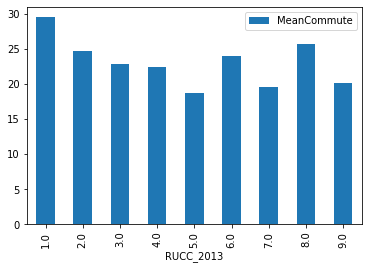

In [137]:
# Display that using pandas plot function
drivetimes.plot(kind='bar');

Real-World Examples

In [138]:
# bash command: get a compressed file in 'tarball' format (this is similar to a .zip file)
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-11-07 21:17:20--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.229.27
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.229.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  35.5MB/s    in 6.1s    

2019-11-07 21:17:27 (32.1 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [139]:
# bash command: de-compress the tarball file (similar to `unzip`)
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [140]:
# bash command: navigate into the new folder.
# Percent sign == "magic" command which changes the underlying state (i.e., new current working directory).
%cd instacart_2017_05_01

/content/instacart_2017_05_01/instacart_2017_05_01/instacart_2017_05_01


In [141]:
# bash command: list the contents of that folder.
!ls *.csv

aisles.csv	 order_products__prior.csv  orders.csv
departments.csv  order_products__train.csv  products.csv


Goal: Reproduce this example

In [142]:
# This is code to display a `.png` inside of a jupyter notebook.
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)
display(example)

In [143]:
# List the contents of the cwd.
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


In [144]:
# Read in the aisles dataset. Do we need anything from here?
aisles = pd.read_csv('aisles.csv')
print(aisles.shape)
aisles.head()

(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [145]:
# Do the same with the department dataset
departments = pd.read_csv('departments.csv')
print(departments.shape)
departments.head()

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [146]:
# And order_products? We need everything from here.
order_products__prior = pd.read_csv('order_products__prior.csv')
print(order_products__prior.shape)
order_products__prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [147]:
# The suffix __train vs __prior indicates it's been split for machine learning purposes. Let's look at the train data
order_products__train = pd.read_csv('order_products__train.csv')
print(order_products__train.shape)
order_products__train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [149]:
# Now let's check orders
orders = pd.read_csv('orders.csv')
print(orders.shape)
orders.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [150]:
# And products?
products = pd.read_csv('products.csv')
print(products.shape)
products.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [151]:
display(example)

Filtering: get a subset of orders

In [152]:
# Look at the orders dataframe
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [153]:
# Filter this dataframe to just the columns we need
orders = orders[['user_id', 'order_id', 'order_number', 'order_dow', 'order_hour_of_day']]
orders.head()

,user_id,order_id,order_number,order_dow,order_hour_of_day
0,1,2539329,1,2,8
1,1,2398795,2,3,7
2,1,473747,3,3,12
3,1,2254736,4,4,7
4,1,431534,5,4,15


In [154]:
# Now filter it to only certain rows. Results in series of booleans
condition = (orders['user_id']==1)
condition

0           True
1           True
2           True
3           True
4           True
           ...  
3421078    False
3421079    False
3421080    False
3421081    False
3421082    False
Name: user_id, Length: 3421083, dtype: bool

In [155]:
# Apply that condition to the orders dataframe
print(orders[condition].shape)
orders[condition]

(11, 5)


,user_id,order_id,order_number,order_dow,order_hour_of_day
0,1,2539329,1,2,8
1,1,2398795,2,3,7
2,1,473747,3,3,12
3,1,2254736,4,4,7
4,1,431534,5,4,15
5,1,3367565,6,2,7
6,1,550135,7,1,9
7,1,3108588,8,1,14
8,1,2295261,9,1,16
9,1,2550362,10,4,8


In [156]:
# A more complicated condition
condition = (orders['user_id']==1) & (orders['order_number'] <= 2)
condition

0           True
1           True
2          False
3          False
4          False
           ...  
3421078    False
3421079    False
3421080    False
3421081    False
3421082    False
Length: 3421083, dtype: bool

In [158]:
# Turn filtered dataframe into its own dataframe
orders_subset = orders[condition]
print(orders_subset.shape)
orders_subset

(2, 5)


,user_id,order_id,order_number,order_dow,order_hour_of_day
0,1,2539329,1,2,8
1,1,2398795,2,3,7


Concatenate order_productsprior and order_productstrain

In [159]:
# Check their shape
print(order_products__prior.shape)
print(order_products__train.shape)

(32434489, 4)
(1384617, 4)


In [160]:
# Concatenate them together
order_products = pd.concat([order_products__prior, order_products__train], axis=0)
order_products.shape

(33819106, 4)

In [162]:
# Get subset of order products -- slim down large dataset to only what I need (2 orders)
condition = (order_products['order_id'] == 2539329) | (order_products['order_id'] == 2398795)
condition

0          False
1          False
2          False
3          False
4          False
           ...  
1384612    False
1384613    False
1384614    False
1384615    False
1384616    False
Name: order_id, Length: 33819106, dtype: bool

In [0]:
# Make a selection of columns
columns = ['order_id',
           'add_to_cart_order', 
           'product_id']

In [164]:
# Use .loc method to filter rows and columns
order_products_subset = order_products.loc[condition, columns]
print(order_products_subset.shape)
order_products_subset.head()

(11, 3)


,order_id,add_to_cart_order,product_id
22742744,2398795,1,196
22742745,2398795,2,10258
22742746,2398795,3,12427
22742747,2398795,4,13176
22742748,2398795,5,26088


In [167]:
# Both subsets are now quite small
print(order_products_subset.shape)
print(orders_subset.shape)

(11, 3)
(2, 5)


In [169]:
# What is their common key?
print(order_products_subset.columns)
print(orders_subset.columns)

Index(['order_id', 'add_to_cart_order', 'product_id'], dtype='object')
Index(['user_id', 'order_id', 'order_number', 'order_dow',
       'order_hour_of_day'],
      dtype='object')


In [170]:
# Merge two dfs on the common key
# 'on' paramater indicates specific column contained in both dataframes
merged = pd.merge(orders_subset, order_products_subset, on='order_id', how='inner')
merged

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id
0,1,2539329,1,2,8,1,196
1,1,2539329,1,2,8,2,14084
2,1,2539329,1,2,8,3,12427
3,1,2539329,1,2,8,4,26088
4,1,2539329,1,2,8,5,26405
5,1,2398795,2,3,7,1,196
6,1,2398795,2,3,7,2,10258
7,1,2398795,2,3,7,3,12427
8,1,2398795,2,3,7,4,13176
9,1,2398795,2,3,7,5,26088


In [171]:
final = pd.merge(merged, products[['product_id', 'product_name']], how='inner', on='product_id')
final.head(11)

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
0,1,2539329,1,2,8,1,196,Soda
1,1,2398795,2,3,7,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
5,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
6,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn
7,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
8,1,2398795,2,3,7,2,10258,Pistachios
9,1,2398795,2,3,7,4,13176,Bag of Organic Bananas


In [172]:
# Is that all?
display(example)

Instacart Dataset

In [9]:
# This is code to display a `.png` file inside of a jupyter notebook.
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
red_green = Image(url=url, width=600)

display(red_green)

In [0]:
# Read back the datasets in their original form, no filters
products = pd.read_csv('products.csv')

order_products = pd.concat([pd.read_csv('order_products__prior.csv'), 
                            pd.read_csv('order_products__train.csv')])

orders = pd.read_csv('orders.csv')

In [0]:
# We only want the first two products
product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

In [17]:
# Subset the products dataframe to only those two
condition = products['product_name'].isin(product_names)
print(products.shape)
products=products[condition]
print(products.shape)
products

(49688, 4)
(2, 4)


,product_id,product_name,aisle_id,department_id
9291,9292,Half And Half Ultra Pasteurized,84,16
30667,30668,Half Baked Frozen Yogurt,37,1


In [19]:
# Associate the hour of the day to a specific product 
# There are no common keys to merge
# order_products allow me to join products and orders though
froyo_cream = (products[['product_id', 'product_name']]
               .merge(order_products[['order_id', 'product_id']])
               .merge(orders[['order_id', 'order_hour_of_day']]))
print(froyo_cream.shape)
froyo_cream.head()

(5978, 4)


,product_id,product_name,order_id,order_hour_of_day
0,9292,Half And Half Ultra Pasteurized,64,16
1,9292,Half And Half Ultra Pasteurized,1883,11
2,9292,Half And Half Ultra Pasteurized,5625,9
3,9292,Half And Half Ultra Pasteurized,7765,14
4,9292,Half And Half Ultra Pasteurized,7906,9


In [20]:
# Subset all that one more time
print(product_names)
froyo = froyo_cream[froyo_cream['product_name']==product_names[0]]
cream = froyo_cream[froyo_cream['product_name']==product_names[1]]
print(froyo.shape)
print(cream.shape)

['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']
(2983, 4)
(2995, 4)


4 Ways to Reshape and Plot

In [21]:
# How many orders included cream, in total and each hour of the day?
print(cream['order_hour_of_day'].count())
cream['order_hour_of_day'].value_counts().sort_index()

2995


0       6
1       1
2       1
4       1
5       4
6      25
7      95
8     323
9     480
10    429
11    292
12    200
13    213
14    215
15    222
16    218
17    111
18     56
19     28
20     32
21     23
22     12
23      8
Name: order_hour_of_day, dtype: int64

In [22]:
# Display that as percents rather than counts
print(round(6/2995,5))
cream_percents = cream['order_hour_of_day'].value_counts(normalize=True).sort_index()
cream_percents

0.002


0     0.002003
1     0.000334
2     0.000334
4     0.000334
5     0.001336
6     0.008347
7     0.031720
8     0.107846
9     0.160267
10    0.143239
11    0.097496
12    0.066778
13    0.071119
14    0.071786
15    0.074124
16    0.072788
17    0.037062
18    0.018698
19    0.009349
20    0.010684
21    0.007679
22    0.004007
23    0.002671
Name: order_hour_of_day, dtype: float64

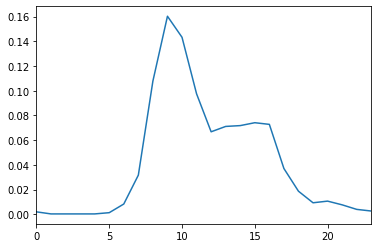

In [23]:
# Display that in plot using panda's built-in graphics library
cream_percents.plot();

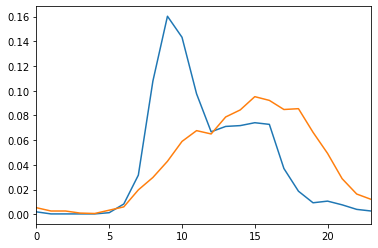

In [24]:
# Display products both together
(cream['order_hour_of_day']
 .value_counts(normalize=True)
 .sort_index()
 .plot())

(froyo['order_hour_of_day']
 .value_counts(normalize=True)
 .sort_index()
 .plot())

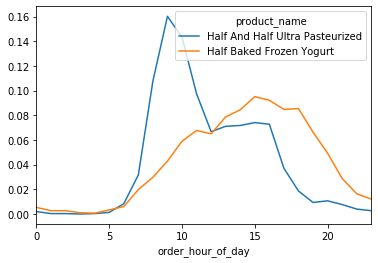

In [25]:
# Same results can be gotten by using panda's crosstabs method
# It generates a legend and requires fewer steps
 pd.crosstab(froyo_cream['order_hour_of_day'],
             froyo_cream['product_name'],
             normalize='columns').plot();

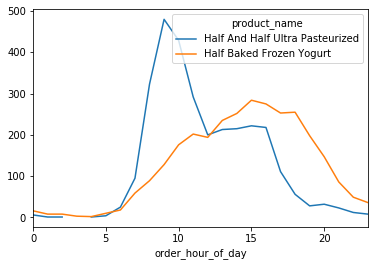

In [29]:
# and also with the panda's pivot_table method
froyo_cream.pivot_table(index='order_hour_of_day',
                        columns='product_name',
                        values='order_id',
                        aggfunc=len).plot();

In [30]:
# What if we want to reshape the table?
# First, display it in 'wide' format
wide_table = pd.crosstab(froyo_cream['order_hour_of_day'],
                         froyo_cream['product_name'],
                         normalize=True)
wide_table

product_name,Half And Half Ultra Pasteurized,Half Baked Frozen Yogurt
order_hour_of_day,,
0,0.001004,0.002676
1,0.000167,0.001338
2,0.000167,0.001338
3,0.000000,0.000502
4,0.000167,0.000335
5,0.000669,0.001673
6,0.004182,0.003011
7,0.015892,0.009870
8,0.054031,0.014888


In [32]:
# Convert from wide to tidy format
tidy_table = wide_table.reset_index().melt(id_vars='order_hour_of_day').rename(columns={
    'order_hour_of_day':'Hour of Day Ordered',
    'product_name':'Product',
    'value':'Percent of Orders by Product'
})
tidy_table

,Hour of Day Ordered,Product,Percent of Orders by Product
0,0,Half And Half Ultra Pasteurized,0.001004
1,1,Half And Half Ultra Pasteurized,0.000167
2,2,Half And Half Ultra Pasteurized,0.000167
3,3,Half And Half Ultra Pasteurized,0.000000
4,4,Half And Half Ultra Pasteurized,0.000167
5,5,Half And Half Ultra Pasteurized,0.000669
6,6,Half And Half Ultra Pasteurized,0.004182
7,7,Half And Half Ultra Pasteurized,0.015892
8,8,Half And Half Ultra Pasteurized,0.054031
9,9,Half And Half Ultra Pasteurized,0.080294


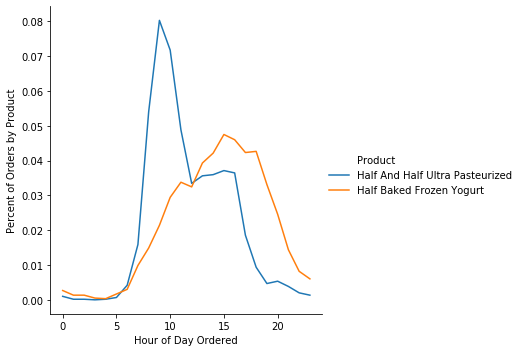

In [35]:
# Display that using seaboarn plotting library
sns.relplot(x='Hour of Day Ordered',
            y='Percent of Orders by Product',
            hue='Product',
            data=tidy_table,
            kind='line');

Load seaborn's flights dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.


In [0]:
flights = sns.load_dataset('flights')

In [37]:
print(flights.shape)
print(flights.columns)
flights.head()

(144, 3)
Index(['year', 'month', 'passengers'], dtype='object')


,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [40]:
flights.pivot_table(index='year',
                    columns='month',
                    )

passengers                       ...                                    
month    January February March April  ... September October November December
year                                   ...                                    
1949         112      118   132   129  ...       136     119      104      118
1950         115      126   141   135  ...       158     133      114      140
1951         145      150   178   163  ...       184     162      146      166
1952         171      180   193   181  ...       209     191      172      194
1953         196      196   236   235  ...       237     211      180      201
1954         204      188   235   227  ...       259     229      203      229
1955         242      233   267   269  ...       312     274      237      278
1956         284      277   317   313  ...       355     306      271      306
1957         315      301   356   348  ...       404     347      305      336
1958         340      318   362   348  ...       404     359      310      337
1959         360      342   406   396  ...       463     407      362      405
1960         417      391   419   461  ...       508     461      390      432

[12 rows x 12 columns]

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [0]:
##### YOUR CODE HERE #####

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####